In [139]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
import tensorboard

In [140]:
%matplotlib inline

In [141]:
data_dir = 'data/outputs'

In [142]:
img_height, img_width = 32*2, 32

# Set the batch size
batch_size = 8

In [143]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.1,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.1,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

Found 1657 files belonging to 2 classes.
Using 1492 files for training.
Found 1657 files belonging to 2 classes.
Using 165 files for validation.


In [144]:
class_names = train_ds.class_names

In [145]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(10).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [146]:
img_height, img_width

(64, 32)

In [147]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.RandomRotation(0.2),
])

In [148]:
model = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    data_augmentation,
    # tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [149]:
# tensorboard callback 
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs")

In [150]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [151]:
epochs=10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[tensorboard_callback]
)

Epoch 1/10
187/187 [==============================] - 7s 31ms/step - loss: 0.5667 - accuracy: 0.7788 - val_loss: 0.3935 - val_accuracy: 0.8545
Epoch 2/10
187/187 [==============================] - 5s 25ms/step - loss: 0.4161 - accuracy: 0.8097 - val_loss: 0.3935 - val_accuracy: 0.8242
Epoch 3/10
187/187 [==============================] - 5s 24ms/step - loss: 0.3907 - accuracy: 0.8365 - val_loss: 0.5147 - val_accuracy: 0.7152
Epoch 4/10
187/187 [==============================] - 5s 24ms/step - loss: 0.3808 - accuracy: 0.8539 - val_loss: 0.3693 - val_accuracy: 0.8848
Epoch 5/10
187/187 [==============================] - 5s 25ms/step - loss: 0.3518 - accuracy: 0.8592 - val_loss: 0.3760 - val_accuracy: 0.8545
Epoch 6/10
187/187 [==============================] - 5s 24ms/step - loss: 0.3654 - accuracy: 0.8472 - val_loss: 0.3720 - val_accuracy: 0.8727
Epoch 7/10
187/187 [==============================] - 5s 24ms/step - loss: 0.3712 - accuracy: 0.8412 - val_loss: 0.4376 - val_accuracy: 0.8545

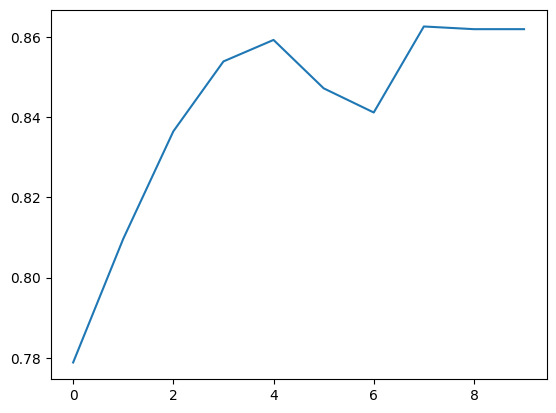

In [152]:
plt.plot(history.history['accuracy'], label='accuracy')

In [153]:
def predict_image_class(image_path, model,thresh = 0.4):
    # Load the saved model

    # Load and preprocess the image
    img = tf.keras.preprocessing.image.load_img(
        image_path, target_size=(32*2, 32)
    )
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    img_array /= 255.

    # Make predictions
    predictions = model(img_array)
    predicted_thresh = predictions[0][0].numpy()
    print(predicted_thresh)
    if predicted_thresh < thresh:
        return 'others'
    else:
        return 'zomato'


In [154]:
# test_img_path = "data/outputs/zomato/_119543822_gettyimages-1233975745.jpg_1.jpg"
import os
# pick a random jpg file
other_files = os.listdir("data/outputs/others")
other_files = [f for f in other_files if f.endswith(".jpg")]
other_files = [os.path.join(data_dir,'others', f) for f in other_files]

zomoto_files = os.listdir("data/outputs/zomato")
zomoto_files = [f for f in zomoto_files if f.endswith(".jpg")]
zomoto_files = [os.path.join(data_dir, 'zomato',f) for f in zomoto_files]


In [155]:
# model.save('model/binary_22')

In [158]:

random_file = np.random.choice(other_files)
print(random_file)
predict_image_class(random_file, model,thresh=.22)

data/outputs/others/EVPcZ_UU8AAdT7O.jpg_2.jpg
0.4441771


'zomato'

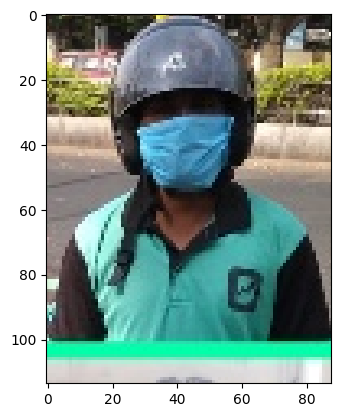

In [159]:
plt.imshow(plt.imread(random_file))